# Praktikum 1 Big Data Analytics

**Aufgabe 1: Kennenlernen von Python und MapReduce Program mit Histogramm** 

## Erklärung
Folgendes ist ein `Programm`, der einen `Zahlzähler` als `Map-Reduce` mithilfe von `Python` Funktionen
implemeniert und danach die vorkommenden `Zahlen` in der `X-Achse` und ihre `Anzahl` in der `Y-Achse`
darstellt. Die Zahlen werden aus der Datei `P.csv` ausgelesen und es wird sichergestellt, dass
nur die Zahlen erfasst und der Größe nach aussortiert werden.
----


Zunächst importieren wir die benötigten Bibliotheken wie: `csv` - Umgang mit `csv`-Dateien, `reduce` aus `functools` - `reduce`-Funktion, `pyplot` aus `matplotlib` - Darstellung des Histogramms.

In [5]:
import csv
from functools import reduce
from matplotlib import pyplot as plt

Die Funktion `cleanNumbers` nimmt als Parameter die Liste der Zahlen in `string`-Darstellung entgegen und filtert zunächst nur diejenigen, die `isdigit()` und Vorzeichen enthalten. Anschließend werden mithilfe einer Typkonvertierung diese Strings in Integers umgewandelt.

In [6]:
def cleanNumbers(numbers):
    cleaned_list = []
    integers_list = []
    for num in numbers:
        digits_only = ''.join(filter(lambda x: x.isdigit() or x in ['-', '+'], num))
        cleaned_list.append(digits_only)
    for c in cleaned_list:
        integers_list.append(int(c))
    return integers_list

Beim Aufruf der folgenden Methode wird für die durch Parameter genommene Zahl ein `dictionary` mit dem Value 1 erzeugt, was später zur Aufzählung benutzt wird.

In [7]:
def mapper(number):
    return {number: 1}

Hier wird die Zahlenhäufigkeit inkrementiert, falls sie in der Liste ist, sonst wird sie erst hinzugefügt. Nach der Iteration wird die Liste zurückgegeben.

In [8]:
def reducer(lhs, rhs):
    for i in rhs:
        if i in lhs:
            lhs[i] += rhs[i]
        else:
            lhs[i] = rhs[i]
    return lhs

Die Funktion `num_reader` öffnet die `P.csv`-Datei, liest sie ein, trennt die Elemente, die mit einem Delimiter (`;`) getrennt gespeichert wurden, wendet die `cleanNumbers()`-Funktion an, um die Nummernwerte zu erhalten und sortiert anschließend diese Liste der Zahlen aufsteigend.

In [11]:
def num_reader():
    with open("P.csv", 'r') as file:
        csvreader = csv.reader(file, delimiter=';')
        for row in csvreader:
            clean_nums = cleanNumbers(row)
            clean_nums.sort()
            return clean_nums

Mapper läuft auf einer verteilten (parallelen) Datenmenge in Subsets und wendet die `mapper`-Funktion auf die einzelnen Werte der Liste an. Die `reduce`-Funktion wird verwendet, um die Funktion auf ein Iterable anzuwenden und anschließend auf einen kumulativen Wert zu reduzieren. Schließlich wenden wir die `bar`-Funktion an, um die X- und Y-Achsen festzulegen, und `show`, um das Histogramm darzustellen.

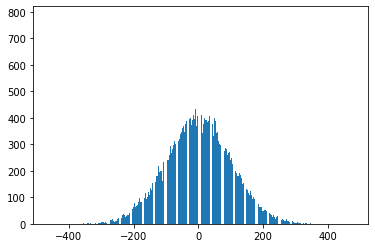

In [12]:
counter = reduce(reducer, map(mapper, num_reader()), {})
plt.bar(counter.keys(), counter.values())
plt.show()